In [1]:
import os
print(os.getcwd())
print(os.listdir())

c:\Ai_Project
['.git', '.venv', 'calculator.py', 'calcultor_operations.py', 'dataset', 'diabetes.csv', 'EDA.ipynb', 'EDA.py', 'font', 'history.txt', 'human.txt', 'process.py', 'python1일차.ipynb', 'python2일차.ipynb', 'python3일차.ipynb', 'python4일차.ipynb', 'python4일차계산기.ipynb', 'python5일차.ipynb', 'python6일차.ipynb', 'python6일차Boston.ipynb', 'python공유문제.ipynb', 'python공유문제2.ipynb', 'report', 'student_data.py', 'watertot.csv', '__pycache__']


결측치 개수:
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
데이터셋 크기: (506, 14)

처음 5개 행:
      CRIM    ZN  INDUS  CHAS    NOX  ...  TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31   0.0  0.538  ...  296     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07   0.0  0.469  ...  242     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07   0.0  0.469  ...  242     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18   0.0  0.458  ...  222     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18   0.0  0.458  ...  222     18.7  396.90    NaN  36.2

[5 rows x 14 columns]

기술통계:
             CRIM          ZN       INDUS  ...           B       LSTAT        MEDV
count  486.000000  486.000000  486.000000  ...  506.000000  486.000000  506.000000
mean     3.611874   11.211934   11.083992  ...  356.674032   12.715432   22.532806
std      8.72

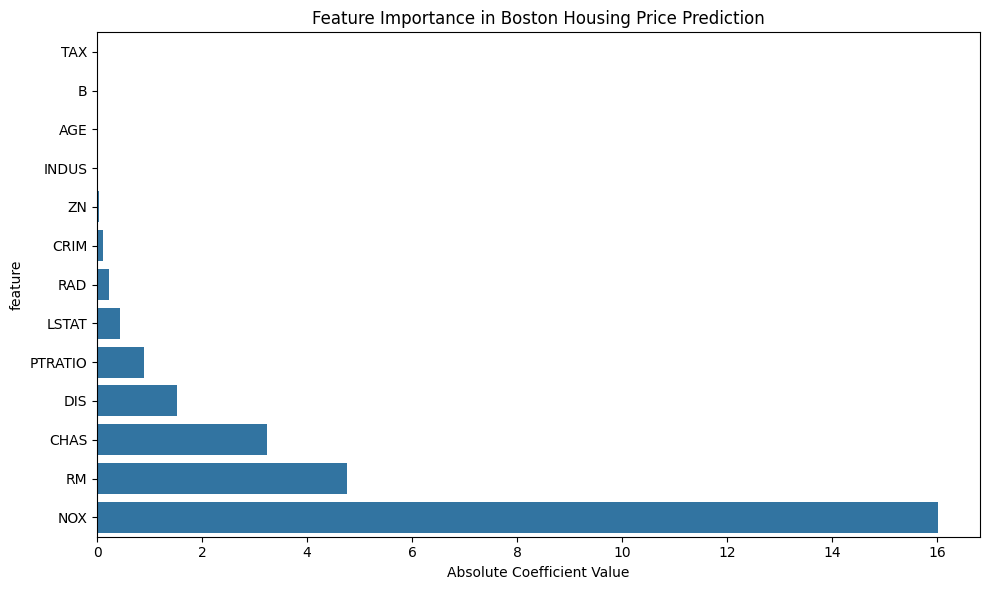

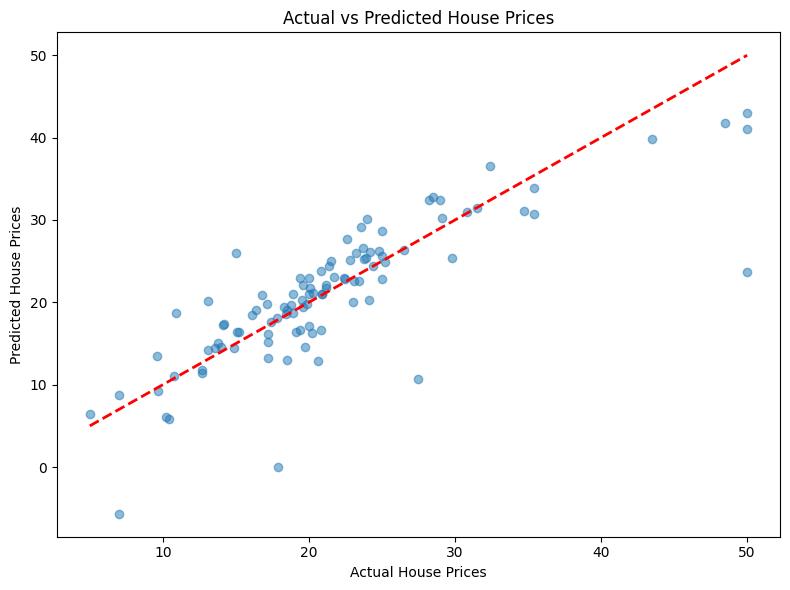

R-squared: 0.7283


In [15]:
import pandas as pd
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.impute import SimpleImputer # 결측치 처리를 위해 추가
import matplotlib.pyplot as plt
import seaborn as sns
import random

df = pd.read_csv('dataset/HousingData.csv')

print("결측치 개수:")
print(df.isnull().sum())

print("데이터셋 크기:", df.shape)
print("\n처음 5개 행:")
print(df.head())
print('\n기술통계:')
print(df.describe())

imputer = SimpleImputer(strategy='mean') # 평균값으로 결측치 대체
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

X = df_imputed.drop('MEDV', axis=1) # df.drop 이 아닌 결측치가 처리 된 데이터를 사용
y=df_imputed['MEDV'] # df.drop 이 아닌 결측치가 처리 된 데이터를 사용

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('\n모델 성능:')
print("R2 점수:", r2_score(y_test, y_pred))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, y_pred))
print("평균 절대 오차 (MAE):", mean_absolute_error(y_test, y_pred))

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(model.coef_)
})

feature_importance=feature_importance.sort_values('importance', ascending=True)

print('\n특성 중요도:')
print(feature_importance)

plt.figure(figsize=(10,6))
sns.barplot(x='importance',y='feature',data=feature_importance)
plt.title('Feature Importance in Boston Housing Price Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')
plt.tight_layout()
plt.show()

r_squared = model.score(X,y)
print(f"R-squared: {r_squared:.4f}")

회귀 계수:
CRIM: -0.1141
ZN: 0.0290
INDUS: -0.0271
CHAS: 3.2407
NOX: -16.0175
RM: 4.7524
AGE: -0.0195
DIS: -1.5216
RAD: 0.2228
TAX: -0.0092
PTRATIO: -0.8860
B: 0.0123
LSTAT: -0.4384

절편: 27.9125

R-squared 값: 0.6589
평균제곱근오차(RMSE): 5.0018


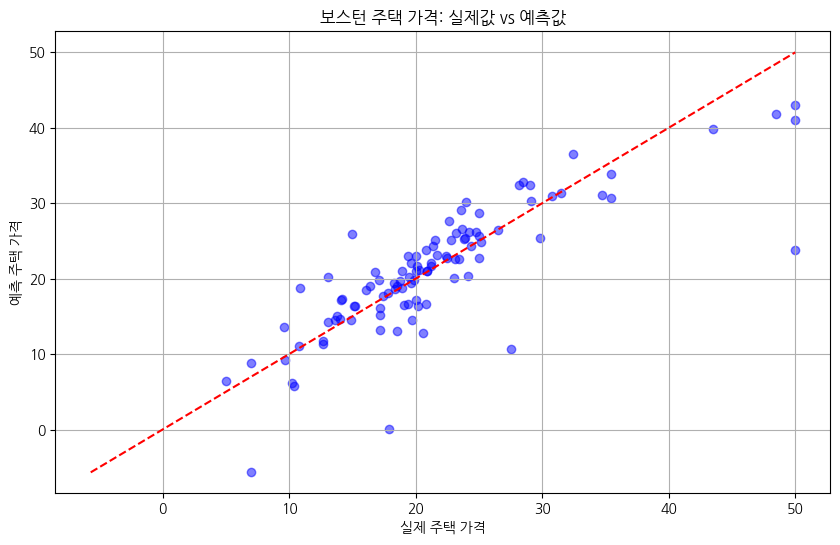


평균적 특성을 가진 주택의 예측 가격: $22.4604k


c:\Ai_Project\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


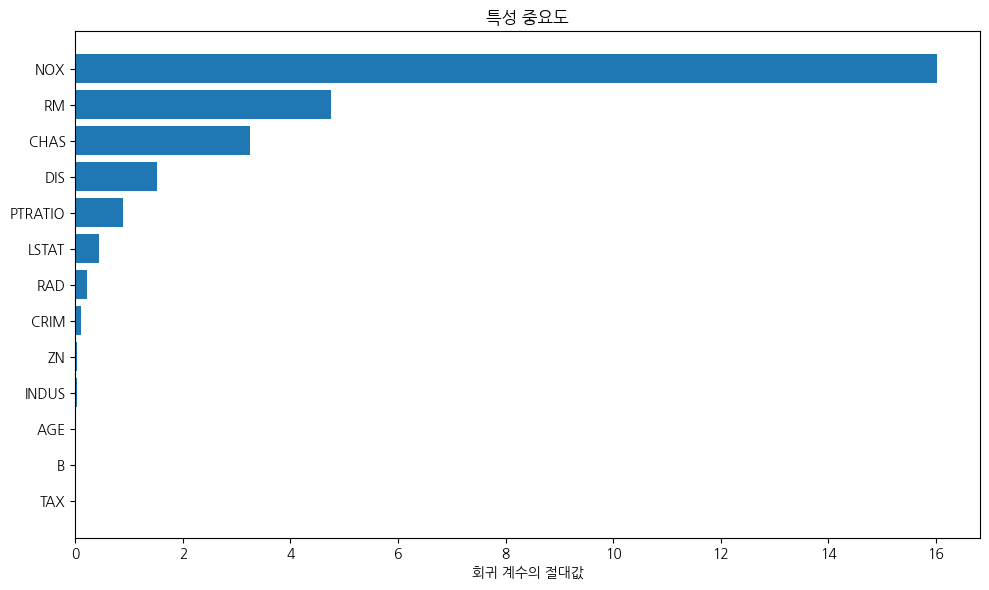

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# 폰트지정
plt.rcParams['font.family'] = 'NanumGothic'
# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False
# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

# 데이터 로드 및 결측치 처리
df = pd.read_csv('dataset/HousingData.csv')
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# 특성과 타겟 분리
X = df_imputed.drop('MEDV', axis=1)
y = df_imputed['MEDV']

# 학습용과 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 결과 출력
print("회귀 계수:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\n절편: {model.intercept_:.4f}")
print(f"\nR-squared 값: {r2_score(y_test, y_pred):.4f}")
print(f"평균제곱근오차(RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

# 실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--')  # 대각선
plt.xlabel('실제 주택 가격')
plt.ylabel('예측 주택 가격')
plt.title('보스턴 주택 가격: 실제값 vs 예측값')
plt.grid(True)
plt.show()

# 새로운 데이터로 예측 예시 (평균값 사용)
new_data = X.mean().values.reshape(1, -1)
prediction = model.predict(new_data)
print(f"\n평균적 특성을 가진 주택의 예측 가격: ${prediction[0]:.4f}k")

# 특성 중요도 시각화
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': abs(model.coef_)
})
feature_importance = feature_importance.sort_values('importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('회귀 계수의 절대값')
plt.title('특성 중요도')
plt.tight_layout()
plt.show()

주요 차이점:

데이터 분할:

첫 번째는 train/test로 데이터를 나누어 모델 성능을 평가
두 번째는 전체 데이터를 사용하여 특성들의 영향도 분석에 중점


분석 목적:

첫 번째는 모델의 예측 성능 평가에 초점 (R2, MSE, MAE)
두 번째는 각 특성이 주택 가격에 미치는 영향 분석에 초점


결과 해석:

첫 번째는 "이 모델이 얼마나 정확하게 예측하는가?"
두 번째는 "각 특성이 가격에 얼마나 영향을 미치는가?"



즉, 같은 데이터와 같은 LinearRegression을 사용하지만, 첫 번째는 예측 성능 검증에, 두 번째는 특성들의 영향도 분석에 중점을 둔다. 둘 다 가치 있는 분석이며, 목적에 따라 적절히 선택하여 사용할 수 있다.